In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import sys
#sys.path.append('/mnt/home/yyuan/codes/CoffeeGPU-develop/python')
#sys.path.append('/Users/yyuan/codes/CoffeeGPU/python')
import os
import toml
from mpl_toolkits.axes_grid1 import make_axes_locatable
from datalib import Data
import pickle

In [2]:
import matplotlib
matplotlib.rc('text',usetex=False)
plt.rc('font',**{'family':'serif','serif':['Times'],'size':20})

In [3]:
%run gen_xmf.py .

0.05
(336, 336, 336)
['Bx', 'By', 'Bz', 'Ex', 'Ey', 'Ez', 'Jx', 'Jy', 'Jz', 'P', 'divB', 'divE']


In [4]:
datadir='.'
data=Data(datadir)

In [5]:
conf = data._conf
print(conf)

{'dt': 0.05, 'max_steps': 5000, 'data_interval': 200, 'periodic_boundary': [False, False, False], 'N': [1344, 1344, 1344], 'guard': [3, 3, 3], 'lower': [-60.0, -60.0, -60.0], 'size': [120.0, 120.0, 120.0], 'nodes': [7, 8, 8], 'shift_ghost': 0, 'downsample': 4, 'a': 0.9, 'calc_current': True, 'clean_ep': True, 'check_egb': True, 'pml': [30, 30, 30], 'pmllen': 10, 'sigpml': 10.0, 'ch2': 1.0, 'tau': 0.05, 'KOeps': 0.4, 'radius': 2.0, 'omega': 0.05, 'b0': 1000.0, 'p1': 0.0, 'p2': 0.492, 'p3': 0.087, 'q11': 0.3, 'q12': 0.0, 'q13': 0.0, 'q22': -0.4, 'q23': -0.99, 'q_offset_x': 0.0, 'q_offset_y': 0.0, 'q_offset_z': -0.4, 'tp_start': 0.0, 'tp_end': 5.0, 'rpert1': 10.0, 'rpert2': 15.0, 'dw0': 0.0}


In [6]:
nmax=conf['max_steps']//conf['data_interval']
print(nmax)
dn1=conf['data_interval']
dt=conf['dt']
print(data._fld_keys)

25
['Bx', 'By', 'Bz', 'Ex', 'Ey', 'Ez', 'Jx', 'Jy', 'Jz', 'P', 'divB', 'divE', 'B', 'J', 'U']


In [7]:
print(data.Bx.shape)
nz,ny,nx = data.Bx.shape
xmin=conf['lower'][0]
ymin=conf['lower'][1]
zmin=conf['lower'][2]
sizex=conf['size'][0]
sizey=conf['size'][1]
sizez=conf['size'][2]
xmax=xmin+sizex
ymax=ymin+sizey
zmax=zmin+sizez
dx=sizex/nx
dy=sizey/ny
dz=sizez/nz
x0=np.arange(xmin,xmax,dx)
y0=np.arange(ymin,ymax,dy)
z0=np.arange(zmin,zmax,dz)

(336, 336, 336)


In [8]:
with open("data_bx.pkl","wb") as f:
    pickle.dump(data.Bx,f)

with open("data_by.pkl","wb") as f:
    pickle.dump(data.By,f)
    
with open("data_bz.pkl","wb") as f:
    pickle.dump(data.Bz,f)

In [9]:
dxpml=conf['pml'][0]/conf['downsample']*2*dx
print('dxpml =',dxpml)
print(dxpml/dx)
dxpml1=conf['pml'][0]*conf['size'][0]/conf['N'][0]
print('dxpml1 =',dxpml1)

dxpml = 5.357142857142858
15.000000000000002
dxpml1 = 2.6785714285714284


In [10]:
b0=conf['b0']
print(b0)
r0=conf['radius']
print(r0)
omega=conf['omega']
print(omega)

1000.0
2.0
0.05


In [11]:
print(2*np.pi/omega)

125.66370614359172


## Slice on the y=0 plane

### t=0

Ptc step not in data directory!


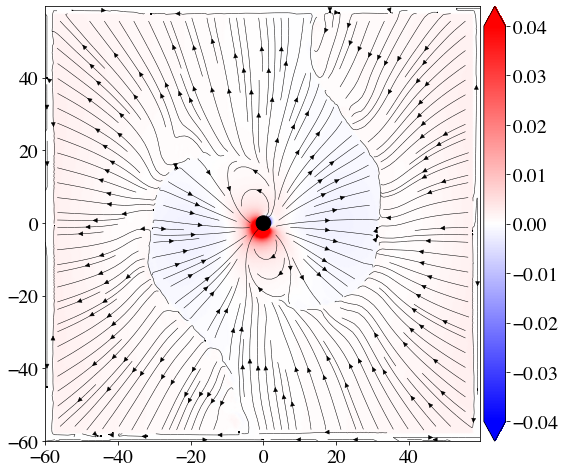

In [12]:
n=21
data.load(n)
lw=0.5
vlim=0.04
xmax=np.amax(x0)
zmax=np.amax(z0)
fig=plt.figure(figsize=(9,8))
iy=ny//2
xx,zz=np.meshgrid(x0,z0)
rr=np.sqrt(xx**2+zz**2)
Bx1=data.Bx[:,iy]
By1=data.By[:,iy]
Bz1=data.Bz[:,iy]
t=n*dt*dn1
ax=fig.add_subplot(111)
im=plt.pcolormesh(xx,zz,By1*rr/b0,cmap='bwr',vmin=-vlim,vmax=vlim,shading='gouraud')
plt.streamplot(xx,zz,Bx1,Bz1,density=2,color='k',linewidth=lw)
ax.set_xlim([xmin,xmax])
ax.set_ylim([zmin,zmax])
ax.set_aspect('equal')
'''
plt.title(r"$t=%.1f$" % t)
plt.xlabel(r"$x$")
plt.ylabel(r"$z$")
'''
circle=plt.Circle((0,0),r0,color='k',fill=True)
ax.add_artist(circle)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,extend='both')
#plt.title(r"$B_y r$")
plt.show()

## Slice on the x=0 plane

### t=0

Ptc step not in data directory!


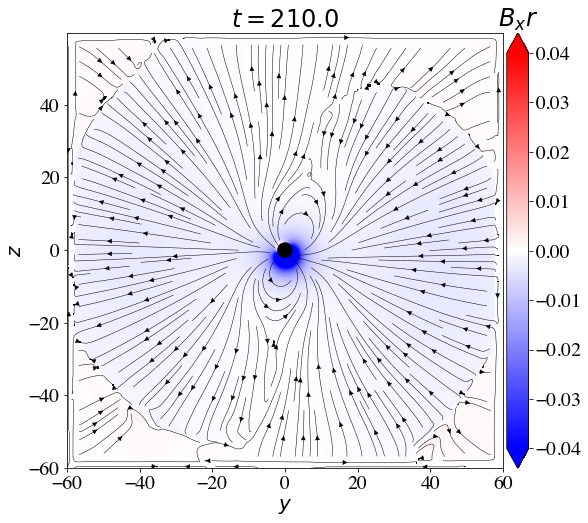

In [13]:
n=21
data.load(n)
lw=0.5
vlim=0.04
xmax=np.amax(x0)
zmax=np.amax(z0)
fig=plt.figure(figsize=(9,8))
ix=nx//2
yy,zz=np.meshgrid(y0,z0)
rr=np.sqrt(yy**2+zz**2)
Bx1=data.Bx[:,:,ix]
By1=data.By[:,:,ix]
Bz1=data.Bz[:,:,ix]
t=n*dt*dn1
ax=fig.add_subplot(111)
im=plt.pcolormesh(yy,zz,Bx1*rr/b0,cmap='bwr',vmin=-vlim,vmax=vlim,shading='gouraud')
plt.streamplot(yy,zz,By1,Bz1,density=2,color='k',linewidth=lw)
ax.set_xlim([ymin,ymax])
ax.set_ylim([zmin,zmax])
ax.set_aspect('equal')
plt.title(r"$t=%.1f$" % t)
plt.xlabel(r"$y$")
plt.ylabel(r"$z$")
circle=plt.Circle((0,0),r0,color='k',fill=True)
ax.add_artist(circle)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,extend='both')
plt.title(r"$B_x r$")
plt.show()

Zoom-in view:

Ptc step not in data directory!


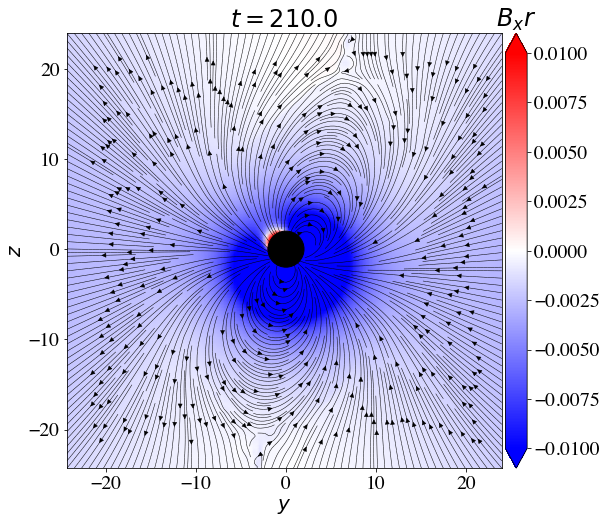

In [14]:
n=21
data.load(n)
lw=0.5
vlim=0.01
xmax=np.amax(x0)
zmax=np.amax(z0)
fig=plt.figure(figsize=(9,8))
ix=nx//2
yy,zz=np.meshgrid(y0,z0)
rr=np.sqrt(yy**2+zz**2)
nc=100
Bx1=data.Bx[nc:nz-nc,nc:ny-nc,ix]
By1=data.By[nc:nz-nc,nc:ny-nc,ix]
Bz1=data.Bz[nc:nz-nc,nc:ny-nc,ix]
yy1=yy[nc:nz-nc,nc:ny-nc]
zz1=zz[nc:nz-nc,nc:ny-nc]
rr1=rr[nc:nz-nc,nc:ny-nc]
t=n*dt*dn1
ax=fig.add_subplot(111)
im=plt.pcolormesh(yy1,zz1,Bx1*rr1/b0,cmap='bwr',vmin=-vlim,vmax=vlim,shading='gouraud')
plt.streamplot(yy1,zz1,By1,Bz1,density=4,color='k',linewidth=lw)
ax.set_xlim([np.amin(yy1),np.amax(yy1)])
ax.set_ylim([np.amin(zz1),np.amax(zz1)])
ax.set_aspect('equal')
plt.title(r"$t=%.1f$" % t)
plt.xlabel(r"$y$")
plt.ylabel(r"$z$")
circle=plt.Circle((0,0),r0,color='k',fill=True)
ax.add_artist(circle)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,extend='both')
plt.title(r"$B_x r$")
plt.show()

Field step not in data directory!
Ptc step not in data directory!


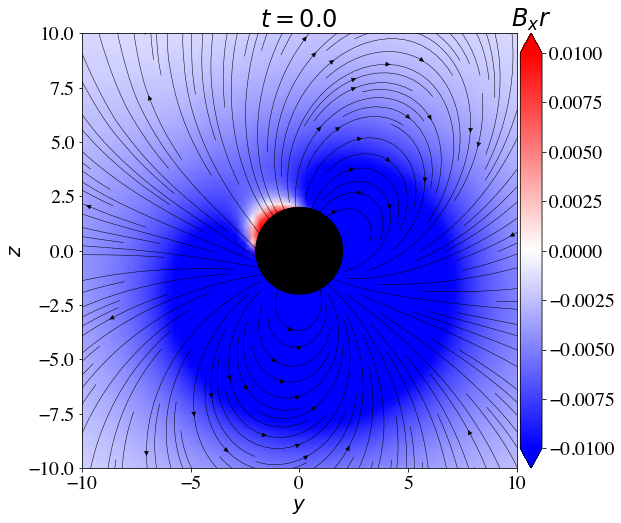

In [15]:
n=0
data.load(n)
lw=0.5
vlim=0.01
xmax=np.amax(x0)
zmax=np.amax(z0)
fig=plt.figure(figsize=(9,8))
ix=nx//2
yy,zz=np.meshgrid(y0,z0)
rr=np.sqrt(yy**2+zz**2)
nc=100
Bx1=data.Bx[nc:nz-nc,nc:ny-nc,ix]
By1=data.By[nc:nz-nc,nc:ny-nc,ix]
Bz1=data.Bz[nc:nz-nc,nc:ny-nc,ix]
yy1=yy[nc:nz-nc,nc:ny-nc]
zz1=zz[nc:nz-nc,nc:ny-nc]
rr1=rr[nc:nz-nc,nc:ny-nc]
t=n*dt*dn1
ax=fig.add_subplot(111)
im=plt.pcolormesh(yy1,zz1,Bx1*rr1/b0,cmap='bwr',vmin=-vlim,vmax=vlim,shading='gouraud')
plt.streamplot(yy1,zz1,By1,Bz1,density=4,color='k',linewidth=lw)
# ax.set_xlim([np.amin(yy1),np.amax(yy1)])
# ax.set_ylim([np.amin(zz1),np.amax(zz1)])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_aspect('equal')
plt.title(r"$t=%.1f$" % t)
plt.xlabel(r"$y$")
plt.ylabel(r"$z$")
circle=plt.Circle((0,0),r0,color='k',fill=True)
ax.add_artist(circle)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,extend='both')
plt.title(r"$B_x r$")
plt.show()

## Slice on the plane with the dipole magnetic axis

### n=5

In [16]:
from scipy.interpolate import RegularGridInterpolator
n=21
data.load(n)
t=n*dn1*dt
fv=np.nan
Bxf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.Bx,(2,1,0)),bounds_error=False, fill_value=fv)
Byf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.By,(2,1,0)),bounds_error=False, fill_value=fv)
Bzf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.Bz,(2,1,0)),bounds_error=False, fill_value=fv)
phi=omega*t+np.pi/2.0
Nx=1000
Nz=1000
xd=-40.0
xu=40.0
zd=-40.0
zu=40.0
xn=np.linspace(xd,xu,Nx)
zn=np.linspace(zd,zu,Nz)
xxn,zzn=np.meshgrid(xn,zn)
rrn=np.sqrt(xxn**2+zzn**2)
xf=xxn.flatten()
zf=zzn.flatten()
cosph=np.cos(phi)
sinph=np.sin(phi)
coords=np.stack((xf*cosph,xf*sinph,zf),axis=-1)
Bx1=np.reshape(Bxf(coords),(Nz,Nx))
By1=np.reshape(Byf(coords),(Nz,Nx))
Bz1=np.reshape(Bzf(coords),(Nz,Nx))
BR=Bx1*cosph+By1*sinph
Bphi=-sinph*Bx1+cosph*By1

Ptc step not in data directory!


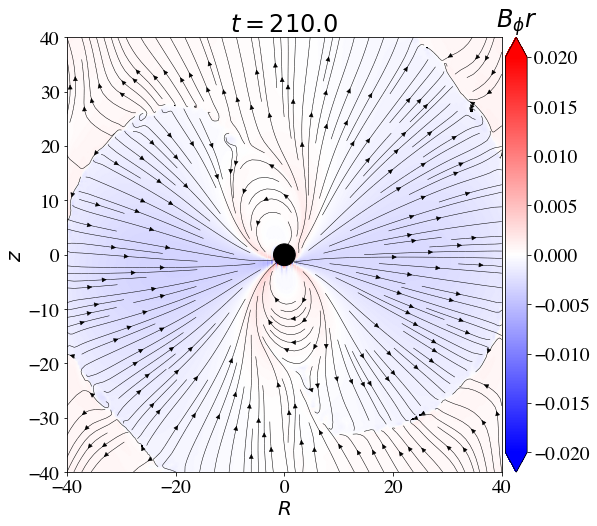

In [17]:
lw=0.5
vlim=0.02
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xxn,zzn,Bphi*rrn/b0,cmap='bwr',vmin=-vlim,vmax=vlim,shading='gouraud')
plt.streamplot(xxn,zzn,BR,Bz1,density=2,color='k',linewidth=lw)
ax.set_xlim([xd,xu])
ax.set_ylim([zd,zu])
ax.set_aspect('equal')
plt.title(r"$t=%.1f$" % t)
plt.xlabel(r"$R$")
plt.ylabel(r"$z$")
circle=plt.Circle((0,0),r0,color='k',fill=True)
ax.add_artist(circle)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,extend='both')
plt.title(r"$B_{\phi} r$")
plt.show()

### n=10

In [18]:
from scipy.interpolate import RegularGridInterpolator
n=10
data.load(n)
t=n*dn1*dt
fv=np.nan
Bxf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.Bx,(2,1,0)),bounds_error=False, fill_value=fv)
Byf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.By,(2,1,0)),bounds_error=False, fill_value=fv)
Bzf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.Bz,(2,1,0)),bounds_error=False, fill_value=fv)
phi=omega*t+np.pi/2.0
Nx=2000
Nz=2000
xd=-40.0
xu=40.0
zd=-40.0
zu=40.0
xn=np.linspace(xd,xu,Nx)
zn=np.linspace(zd,zu,Nz)
xxn,zzn=np.meshgrid(xn,zn)
rrn=np.sqrt(xxn**2+zzn**2)
xf=xxn.flatten()
zf=zzn.flatten()
cosph=np.cos(phi)
sinph=np.sin(phi)
coords=np.stack((xf*cosph,xf*sinph,zf),axis=-1)
Bx1=np.reshape(Bxf(coords),(Nz,Nx))
By1=np.reshape(Byf(coords),(Nz,Nx))
Bz1=np.reshape(Bzf(coords),(Nz,Nx))
BR=Bx1*cosph+By1*sinph
Bphi=-sinph*Bx1+cosph*By1

Field step not in data directory!
Ptc step not in data directory!


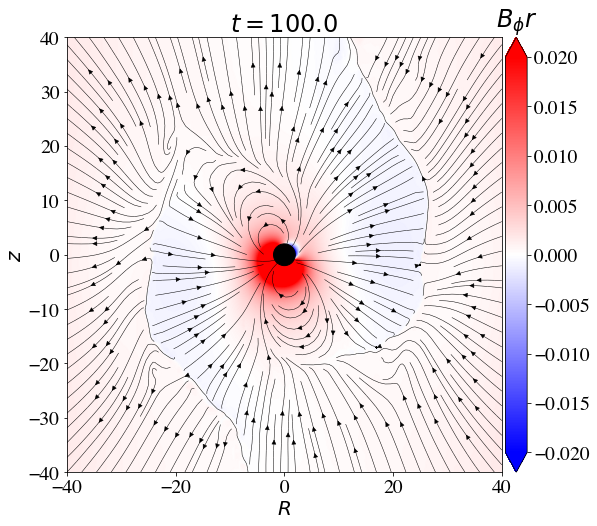

In [19]:
lw=0.5
vlim=0.02
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xxn,zzn,Bphi*rrn/b0,cmap='bwr',vmin=-vlim,vmax=vlim,shading='gouraud')
plt.streamplot(xxn,zzn,BR,Bz1,density=2,color='k',linewidth=lw)
ax.set_xlim([xd,xu])
ax.set_ylim([zd,zu])
ax.set_aspect('equal')
plt.title(r"$t=%.1f$" % t)
plt.xlabel(r"$R$")
plt.ylabel(r"$z$")
circle=plt.Circle((0,0),r0,color='k',fill=True)
ax.add_artist(circle)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,extend='both')
plt.title(r"$B_{\phi} r$")
plt.show()

### n=20

In [20]:
from scipy.interpolate import RegularGridInterpolator
n=20
data.load(n)
t=n*dn1*dt
fv=np.nan
Bxf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.Bx,(2,1,0)),bounds_error=False, fill_value=fv)
Byf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.By,(2,1,0)),bounds_error=False, fill_value=fv)
Bzf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.Bz,(2,1,0)),bounds_error=False, fill_value=fv)
phi=omega*t+np.pi/2.0
Nx=1000
Nz=1000
xd=-40.0
xu=40.0
zd=-40.0
zu=40.0
xn=np.linspace(xd,xu,Nx)
zn=np.linspace(zd,zu,Nz)
xxn,zzn=np.meshgrid(xn,zn)
rrn=np.sqrt(xxn**2+zzn**2)
xf=xxn.flatten()
zf=zzn.flatten()
cosph=np.cos(phi)
sinph=np.sin(phi)
coords=np.stack((xf*cosph,xf*sinph,zf),axis=-1)
Bx1=np.reshape(Bxf(coords),(Nz,Nx))
By1=np.reshape(Byf(coords),(Nz,Nx))
Bz1=np.reshape(Bzf(coords),(Nz,Nx))
BR=Bx1*cosph+By1*sinph
Bphi=-sinph*Bx1+cosph*By1

Field step not in data directory!
Ptc step not in data directory!


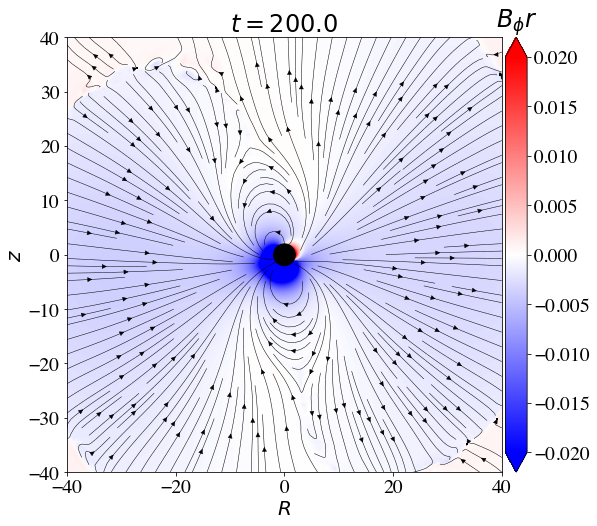

In [21]:
lw=0.5
vlim=0.02
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xxn,zzn,Bphi*rrn/b0,cmap='bwr',vmin=-vlim,vmax=vlim,shading='gouraud')
plt.streamplot(xxn,zzn,BR,Bz1,density=2,color='k',linewidth=lw)
ax.set_xlim([xd,xu])
ax.set_ylim([zd,zu])
ax.set_aspect('equal')
plt.title(r"$t=%.1f$" % t)
plt.xlabel(r"$R$")
plt.ylabel(r"$z$")
circle=plt.Circle((0,0),r0,color='k',fill=True)
ax.add_artist(circle)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,extend='both')
plt.title(r"$B_{\phi} r$")
plt.show()

## Slice of $\lambda$

Plot of the parameter $\lambda$, defined as $$\nabla\times(\mathbf{B}+\pmb{\beta}_0\times(\pmb{\beta}_0\times\mathbf{B}))=\lambda\mathbf{B}$$

In [22]:
def dfdx(f):
    tmp=np.zeros_like(f)
    tmp[:,:,1:-1]=(f[:,:,2:]-f[:,:,0:-2])/2.0/dx
    return tmp
def dfdy(f):
    tmp=np.zeros_like(f)
    tmp[:,1:-1]=(f[:,2:]-f[:,0:-2])/2.0/dy
    return tmp
def dfdz(f):
    tmp=np.zeros_like(f)
    tmp[1:-1]=(f[2:]-f[0:-2])/2.0/dz
    return tmp

### n=20

In [23]:
n=20
data.load(n)
t=n*dn1*dt
x1,y1,z1=np.meshgrid(x0,y0,z0,indexing='ij')
x1=np.transpose(x1,(2,1,0))
y1=np.transpose(y1,(2,1,0))
z1=np.transpose(z1,(2,1,0))
vx=-omega*y1
vy=omega*x1
vz=0
vBx=vy*data.Bz-vz*data.By
vBy=vz*data.Bx-vx*data.Bz
vBz=vx*data.By-vy*data.Bx
vvBx=vy*vBz-vz*vBy
vvBy=vz*vBx-vx*vBz
vvBz=vx*vBy-vy*vBx
hx=data.Bx+vvBx
hy=data.By+vvBy
hz=data.Bz+vvBz
chx=dfdy(hz)-dfdz(hy)
chy=dfdz(hx)-dfdx(hz)
chz=dfdx(hy)-dfdy(hx)
ll=(chx*data.Bx+chy*data.By+chz*data.Bz)/(data.Bx**2+data.By**2+data.Bz**2)

Field step not in data directory!
Ptc step not in data directory!


In [24]:
from scipy.interpolate import RegularGridInterpolator
fv=np.nan
Bxf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.Bx,(2,1,0)),bounds_error=False, fill_value=fv)
Byf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.By,(2,1,0)),bounds_error=False, fill_value=fv)
Bzf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.Bz,(2,1,0)),bounds_error=False, fill_value=fv)
llf=RegularGridInterpolator((x0,y0,z0),np.transpose(ll,(2,1,0)),bounds_error=False, fill_value=fv)
phi=omega*t+np.pi/2.0
Nx=2000
Nz=2000
xd=-40.0
xu=40.0
zd=-40.0
zu=40.0
xn=np.linspace(xd,xu,Nx)
zn=np.linspace(zd,zu,Nz)
xxn,zzn=np.meshgrid(xn,zn)
rrn=np.sqrt(xxn**2+zzn**2)
xf=xxn.flatten()
zf=zzn.flatten()
cosph=np.cos(phi)
sinph=np.sin(phi)
coords=np.stack((xf*cosph,xf*sinph,zf),axis=-1)
Bx1=np.reshape(Bxf(coords),(Nz,Nx))
By1=np.reshape(Byf(coords),(Nz,Nx))
Bz1=np.reshape(Bzf(coords),(Nz,Nx))
ll1=np.reshape(llf(coords),(Nz,Nx))
BR=Bx1*cosph+By1*sinph
Bphi=-sinph*Bx1+cosph*By1

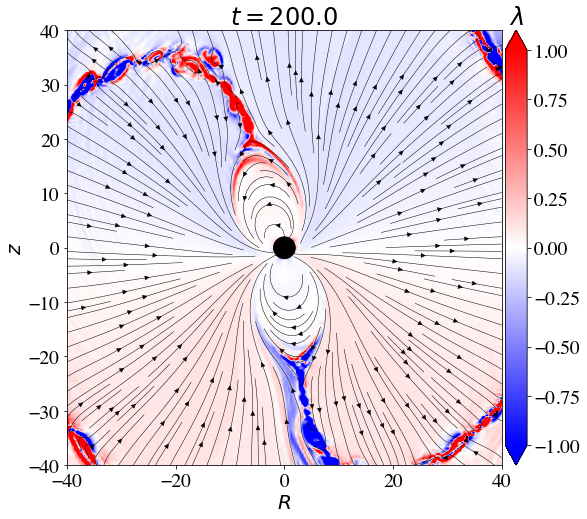

In [25]:
lw=0.5
vlim=1
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xxn,zzn,ll1,cmap='bwr',vmin=-vlim,vmax=vlim,shading='gouraud')
plt.streamplot(xxn,zzn,BR,Bz1,density=2,color='k',linewidth=lw)
ax.set_xlim([xd,xu])
ax.set_ylim([zd,zu])
ax.set_aspect('equal')
plt.title(r"$t=%.1f$" % t)
plt.xlabel(r"$R$")
plt.ylabel(r"$z$")
circle=plt.Circle((0,0),r0,color='k',fill=True)
ax.add_artist(circle)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,extend='both')
plt.title(r"$\lambda$")
plt.savefig("current_sheet.png")
plt.show()

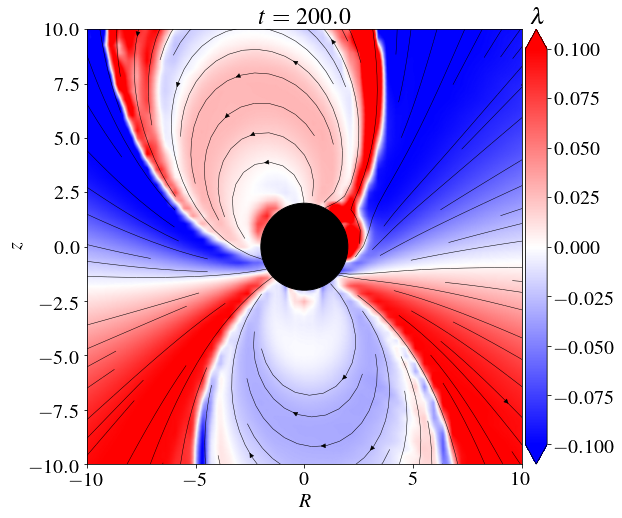

In [29]:
lw=0.5
vlim=0.1
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xxn,zzn,ll1,cmap='bwr',vmin=-vlim,vmax=vlim,shading='gouraud')
plt.streamplot(xxn,zzn,BR,Bz1,density=4,color='k',linewidth=lw)
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_aspect('equal')
plt.title(r"$t=%.1f$" % t)
plt.xlabel(r"$R$")
plt.ylabel(r"$z$")
circle=plt.Circle((0,0),r0,color='k',fill=True)
ax.add_artist(circle)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,extend='both')
plt.title(r"$\lambda$")
plt.show()

## Slice of $\lambda$ (better way of calculation)

Plot of the parameter $\lambda$, defined as $$\nabla\times(\mathbf{B}+\pmb{\beta}_0\times(\pmb{\beta}_0\times\mathbf{B}))=\lambda\mathbf{B}$$
Note that we have
$$\nabla\times(\mathbf{B}+\pmb{\beta}_0\times(\pmb{\beta}_0\times\mathbf{B}))=\mathbf{J}-\rho(\pmb{\Omega}\times\mathbf{r})$$

### n=20

In [30]:
n=20
data.load(n)
t=n*dn1*dt
x1,y1,z1=np.meshgrid(x0,y0,z0,indexing='ij')
x1=np.transpose(x1,(2,1,0))
y1=np.transpose(y1,(2,1,0))
z1=np.transpose(z1,(2,1,0))
vx=-omega*y1
vy=omega*x1
vz=0
chx=data.Jx-data.divE*vx
chy=data.Jy-data.divE*vy
chz=data.Jz-data.divE*vz
ll=(chx*data.Bx+chy*data.By+chz*data.Bz)/(data.Bx**2+data.By**2+data.Bz**2)

Ptc step not in data directory!


In [31]:
from scipy.interpolate import RegularGridInterpolator
fv=np.nan
Bxf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.Bx,(2,1,0)),bounds_error=False, fill_value=fv)
Byf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.By,(2,1,0)),bounds_error=False, fill_value=fv)
Bzf=RegularGridInterpolator((x0,y0,z0),np.transpose(data.Bz,(2,1,0)),bounds_error=False, fill_value=fv)
llf=RegularGridInterpolator((x0,y0,z0),np.transpose(ll,(2,1,0)),bounds_error=False, fill_value=fv)
phi=omega*t+np.pi/2.0
Nx=2000
Nz=2000
xd=-40.0
xu=40.0
zd=-40.0
zu=40.0
xn=np.linspace(xd,xu,Nx)
zn=np.linspace(zd,zu,Nz)
xxn,zzn=np.meshgrid(xn,zn)
rrn=np.sqrt(xxn**2+zzn**2)
xf=xxn.flatten()
zf=zzn.flatten()
cosph=np.cos(phi)
sinph=np.sin(phi)
coords=np.stack((xf*cosph,xf*sinph,zf),axis=-1)
Bx1=np.reshape(Bxf(coords),(Nz,Nx))
By1=np.reshape(Byf(coords),(Nz,Nx))
Bz1=np.reshape(Bzf(coords),(Nz,Nx))
ll1=np.reshape(llf(coords),(Nz,Nx))
BR=Bx1*cosph+By1*sinph
Bphi=-sinph*Bx1+cosph*By1

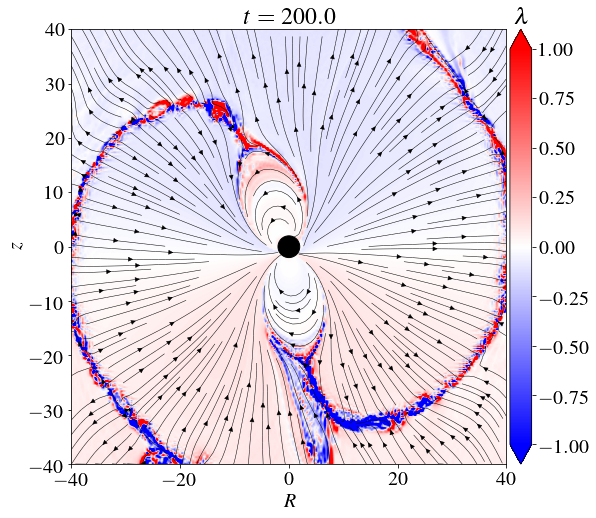

In [32]:
lw=0.5
vlim=1
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xxn,zzn,ll1,cmap='bwr',vmin=-vlim,vmax=vlim,shading='gouraud')
plt.streamplot(xxn,zzn,BR,Bz1,density=2,color='k',linewidth=lw)
ax.set_xlim([xd,xu])
ax.set_ylim([zd,zu])
ax.set_aspect('equal')
plt.title(r"$t=%.1f$" % t)
plt.xlabel(r"$R$")
plt.ylabel(r"$z$")
circle=plt.Circle((0,0),r0,color='k',fill=True)
ax.add_artist(circle)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,extend='both')
plt.title(r"$\lambda$")
plt.show()

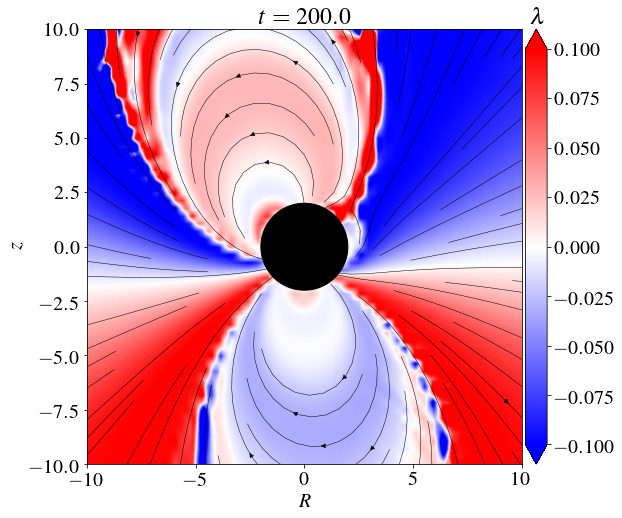

In [33]:
lw=0.5
vlim=0.1
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(xxn,zzn,ll1,cmap='bwr',vmin=-vlim,vmax=vlim,shading='gouraud')
plt.streamplot(xxn,zzn,BR,Bz1,density=4,color='k',linewidth=lw)
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_aspect('equal')
plt.title(r"$t=%.1f$" % t)
plt.xlabel(r"$R$")
plt.ylabel(r"$z$")
circle=plt.Circle((0,0),r0,color='k',fill=True)
ax.add_artist(circle)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax,extend='both')
plt.title(r"$\lambda$")
plt.show()